In [2]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir+ os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 



In [3]:
# Fix parameters for building yield curve instruments
instrumentsconfig={
            "DEPO": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360"
            },
            "FRA": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360",
            },
            "IRS": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360",
                "frequency": "Annual"
            }
        } 

In [4]:
# Fix parameters for building yield curve

yieldcurveconfig={
        "settlementDays": 2,
        "intpMethod": "LINEAR",
        "currency": "EUR",
        "calendar": "TARGET",
        "dayCounter": "Actual365Fixed",
        "period": "6M",
        "instruments":instrumentsconfig,}

In [5]:
result =  {
    "valuationDate": "2021-03-10",
    "yieldCurve":yieldcurveconfig ,
    "yieldData": yielddata.to_dict('r')
}
try:
    result = api.createTask(CalculationType.YIELD_CURVE, result,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()

In [6]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

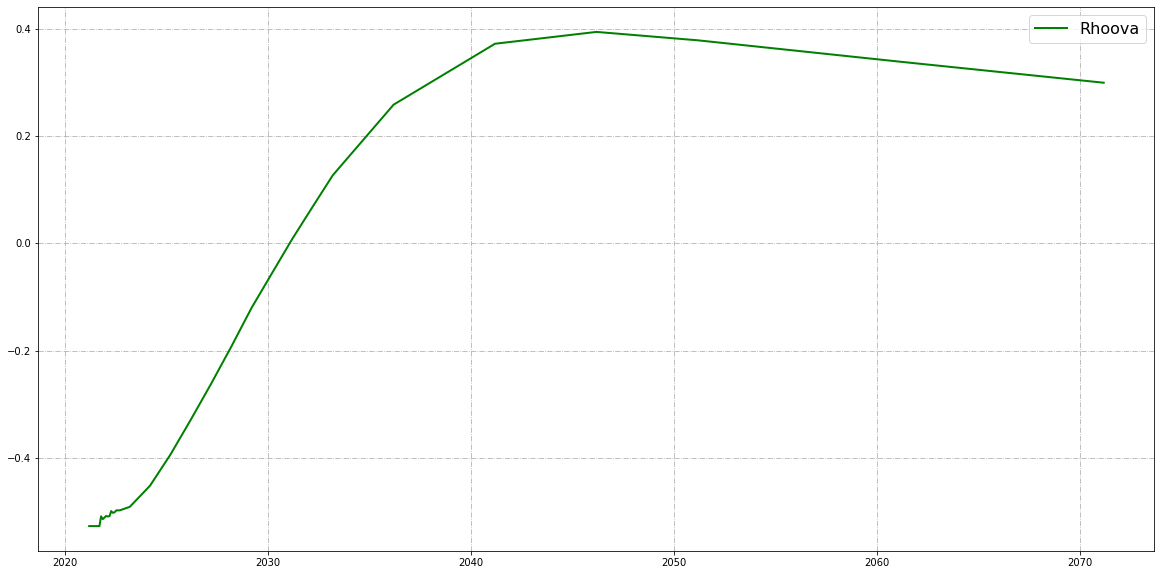

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y2 = list(rhoovayieldcurvedicts.values())


ax.plot(x,y2, 'g', label='Rhoova', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

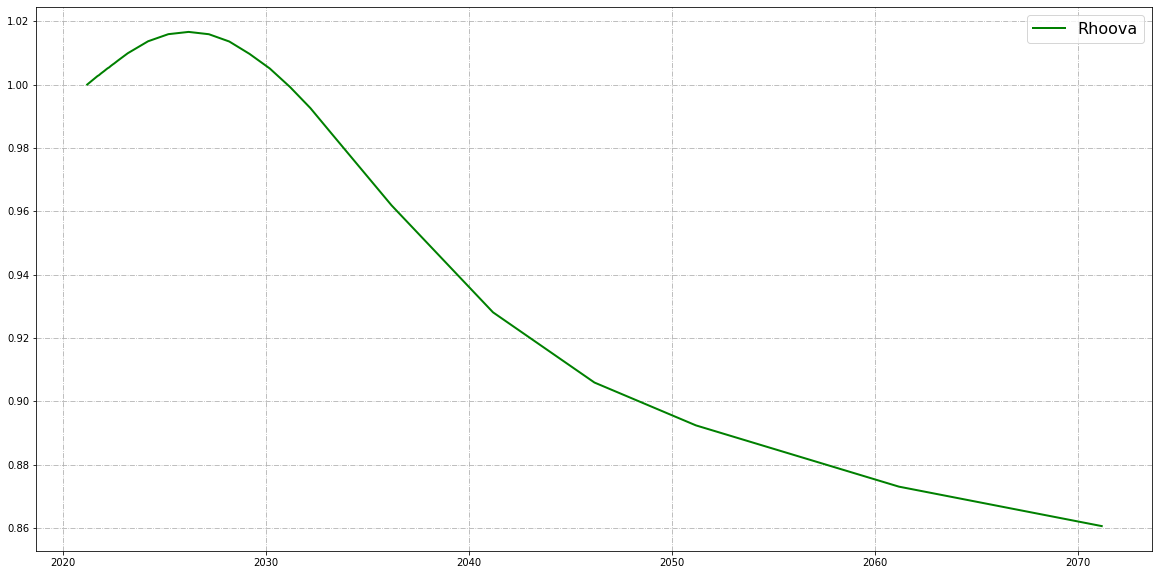

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvediscounts.keys())
y2 = list(rhoovayieldcurvediscounts.values())

ax.plot(x,y2, 'g', label='Rhoova', linewidth=2)

leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [9]:
pTable = pt.PrettyTable(['Maturity','Rhoova ZeroRates','Rhoova Discount Rate'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key, val,rhoovayieldcurvediscounts.get(key)])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------------+----------------------+
|  Maturity  | Rhoova ZeroRates | Rhoova Discount Rate |
+------------+------------------+----------------------+
| 2021-03-12 |    -0.527928     |          1           |
| 2021-09-13 |    -0.527928     |       1.002679       |
| 2021-10-12 |    -0.509667     |       1.002993       |
| 2021-11-12 |    -0.514946     |       1.003462       |
| 2021-12-14 |    -0.511805     |       1.003892       |
| 2022-01-12 |    -0.508977     |       1.004276       |
| 2022-02-14 |    -0.510082     |       1.004749       |
| 2022-03-14 |    -0.509271     |       1.005134       |
| 2022-04-12 |    -0.499835     |       1.005438       |
| 2022-05-12 |    -0.503181     |       1.005890       |
| 2022-06-13 |    -0.502110     |       1.006320       |
| 2022-07-12 |    -0.498637     |       1.006675       |
| 2022-08-15 |    -0.498559     |       1.007142       |
| 2022-09-14 |    -0.498528     |       1.007554       |
| 2023-03-13 |    -0.491975    